## Motivation

Predicting diabetes can be useful for early detection and prevention of the disease. 

Global data:

- 537 million adults (20-79 years) are living with diabetes (1 in 10). This number is predicted to rise to 643 million by 2030 and 783 million by 2045.
- Over 3 in 4 adults with diabetes live in low- and middle-income countries.
- Diabetes is responsible for 6.7 million deaths in 2021 - 1 every 5 seconds.
- Diabetes caused at least USD 966 billion dollars in health expenditure – a 316% increase over the last 15 years.

Source:
International Diabetes Federation.
IDF Diabetes Atlas, 10th edn. Brussels,
Belgium: 2021. Available at: https://www.diabetesatlas.org

<center><h1>Data Preparation and Exploratory Data Analysis (EDA)</h1></center> 

First, it is described the general aspects of the dataset. Then, the missing data is imputed. It is commented distribution plots before and after imputation. Finally, the scaling of the data and the visualization of the correlations between variables were carried out. Results were compared with other imputation methods.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

Loading the dataset

In [3]:
dfDia = pd.read_csv(".\datasets\diabetes.csv")

Printing the last 10 values of the Dataframe.

In [4]:
dfDia.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (mg/dL)
- Blood Pressure: Diastolic blood pressure (mm Hg)
- Skin Thickness: Triceps skin fold thickness. Used to estimate body fat, normal value in women is 23 mm. Higher thickness leads to obesity and chances of diabetes increases.
- Insulin: 2-Hour Serum Insulin (&mu;U/mL)
- BMI: Body Mass Index (kg/m&sup2;)
- Diabetes Pedigree Function: It is a score that represents the diabetes mellitus history in the relatives of an individual. The range of the DPF is from 0 to infinity, where higher values indicate a stronger family history of diabetes. However, in practice, the DPF is usually capped at a maximum value of 2.5 to prevent it from having an undue influence on the overall risk score for diabetes.
- Age: Age (years)
- Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

Obtaining information about data count, null values, data types, etc.

In [5]:
dfDia.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Printing general drescriptive statistics.

In [6]:
dfDia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are illogical values of zero in Glucose, BloodPressure, Skin Thickness, Insulin and BMI. They have to be missing values.

Proportion of classes:

Not diabetes (y = 0), diabetes (y = 1)

0    500
1    268
Name: Outcome, dtype: int64

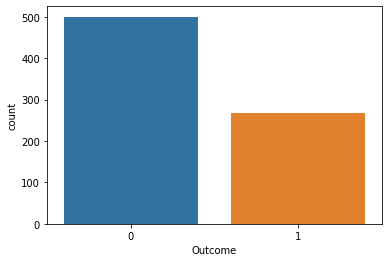

In [7]:
sns.countplot(x = "Outcome", data = dfDia)
dfDia.loc[:, 'Outcome'].value_counts()

When representing on histograms it can be seeing clearly the values of zero. The other values make sense.

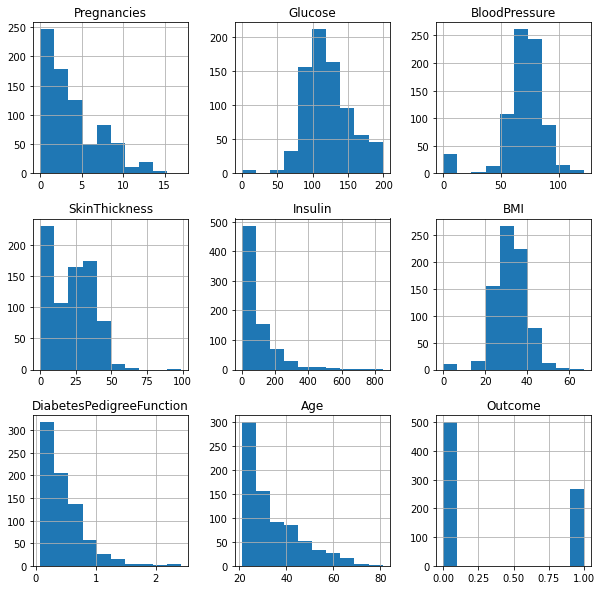

In [8]:
histRaw = dfDia.hist(figsize = (10,10))

We need to impute the data, i.e. to infer them from the known part of the data. For that purpose, first you have to replace zero values by NaN in the columns mencioned above.

In [9]:
dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']] = dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']].replace(0,np.NaN)

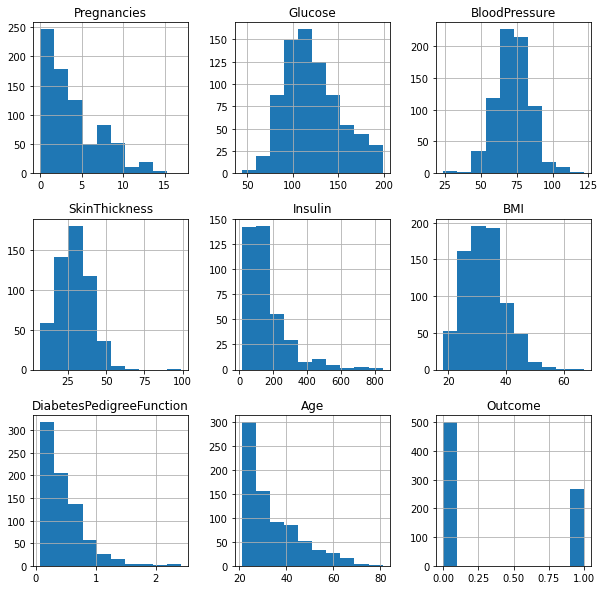

In [10]:
histNaN = dfDia.hist(figsize = (10,10))

Counting null values:

In [11]:
dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']].isnull().sum()
#explicar que hay demasiados

BMI               11
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64

## Outliers

Outliers should be considered for the correlation method and data scaling.

In [12]:
# calculate the IQR for each numerical column
Q1 = dfDia.quantile(0.25)
Q3 = dfDia.quantile(0.75)
IQR = Q3 - Q1

# align the indices
dfDia, Q1 = dfDia.align(Q1, join='left', axis=1)
dfDia, Q3 = dfDia.align(Q3, join='left', axis=1)
dfDia, IQR = dfDia.align(IQR, join='left', axis=1)

# identify outliers in each column
outliers = ((dfDia < (Q1 - 1.5 * IQR)) | (dfDia > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


## Conditional Mean/Median Imputation

We have lot of NaN values in "SkinThickness" and "Insulin" columns (near to 49 and 30 percent respectively), mean imputation to the whole data would affect the individual trend of each class of data points with a binary target variable. *Conditional mean/median imputation* can help to preserve the trend of each class and prevent the introduction of bias that may occur with mean imputation on the entire dataset. This approach is commonly used in data preprocessing and can help improve the performance of the machine learning model by reducing the impact of missing data on the analysis.

When the median value (50%) is similar to the mean, the distribution is symmetric.

In [13]:
dfDia[['SkinThickness','BMI','BloodPressure']].describe().loc[['mean','50%']]

,SkinThickness,BMI,BloodPressure
mean,29.15342,32.457464,72.405184
50%,29.00000,32.300000,72.000000


In [14]:
means_0 = dfDia.loc[dfDia['Outcome'] == 0, ['SkinThickness', 'BMI', 'BloodPressure']].mean()
means_1 = dfDia.loc[dfDia['Outcome'] == 1, ['SkinThickness', 'BMI', 'BloodPressure']].mean()
medians_0 = dfDia.loc[dfDia['Outcome'] == 0, ['Glucose', 'Insulin']].median()
medians_1 = dfDia.loc[dfDia['Outcome'] == 1, ['Glucose', 'Insulin']].median()

With this type of distribution, we use the mean in order to follow the central tendency of the data.

Calculating conditional means.

In [15]:
means_0 = dfDia.loc[dfDia['Outcome'] == 0, ['SkinThickness', 'BMI', 'BloodPressure']].mean()
means_1 = dfDia.loc[dfDia['Outcome'] == 1, ['SkinThickness', 'BMI', 'BloodPressure']].mean()

Imputing missing values using the conditional means.

In [16]:
dfDia.loc[(dfDia['Outcome'] == 0) & (dfDia['SkinThickness'].isna()), 'SkinThickness'] = means_0['SkinThickness']
dfDia.loc[(dfDia['Outcome'] == 0) & (dfDia['BMI'].isna()), 'BMI'] = means_0['BMI']
dfDia.loc[(dfDia['Outcome'] == 0) & (dfDia['BloodPressure'].isna()), 'BloodPressure'] = means_0['BloodPressure']
dfDia.loc[(dfDia['Outcome'] == 1) & (dfDia['SkinThickness'].isna()), 'SkinThickness'] = means_1['SkinThickness']
dfDia.loc[(dfDia['Outcome'] == 1) & (dfDia['BMI'].isna()), 'BMI'] = means_1['BMI']
dfDia.loc[(dfDia['Outcome'] == 1) & (dfDia['BloodPressure'].isna()), 'BloodPressure'] = means_1['BloodPressure']

Checking if NaNs values are completely filled.

In [17]:
dfDia[['SkinThickness','BMI','BloodPressure']].isnull().sum()

SkinThickness    0
BMI              0
BloodPressure    0
dtype: int64

When the mean is very different from the median, it is said to have a skewed distribution.

In [18]:
dfDia[['Glucose','Insulin']].describe().loc[['mean','50%']]

,Glucose,Insulin
mean,121.686763,155.548223
50%,117.000000,125.000000


Now we use the median to follow the central tendency.

Calculating conditional medians.

In [19]:
medians_0 = dfDia.loc[dfDia['Outcome'] == 0, ['Glucose', 'Insulin']].median()
medians_1 = dfDia.loc[dfDia['Outcome'] == 1, ['Glucose', 'Insulin']].median()

Imputing missing values using the conditional medians.

In [20]:
dfDia.loc[(dfDia['Outcome'] == 0) & (dfDia['Glucose'].isna()), 'Glucose'] = medians_0['Glucose']
dfDia.loc[(dfDia['Outcome'] == 0) & (dfDia['Insulin'].isna()), 'Insulin'] = medians_0['Insulin']
dfDia.loc[(dfDia['Outcome'] == 1) & (dfDia['Glucose'].isna()), 'Glucose'] = medians_1['Glucose']
dfDia.loc[(dfDia['Outcome'] == 1) & (dfDia['Insulin'].isna()), 'Insulin'] = medians_1['Insulin']

Checking if NaNs values are completely filled.

In [21]:
dfDia[['Glucose','Insulin']].isnull().sum()

Glucose    0
Insulin    0
dtype: int64

## Final histograms

Now, the data is cleaned and imputed. We plot his histogram.

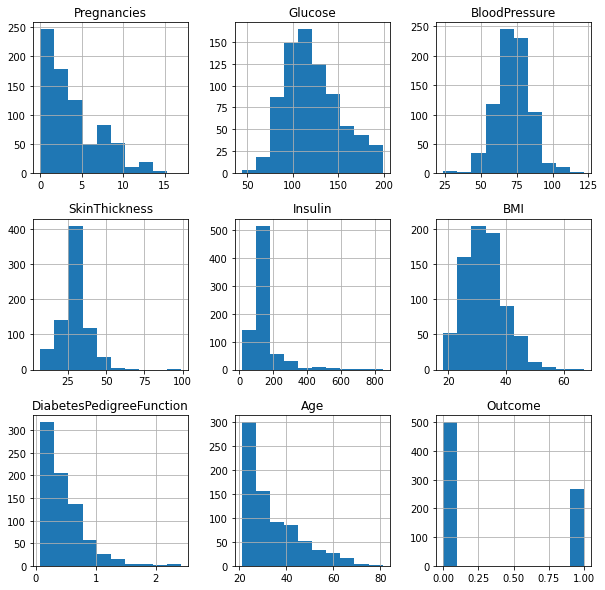

In [22]:
histClean = dfDia.hist(figsize = (10,10))

## Violin plots

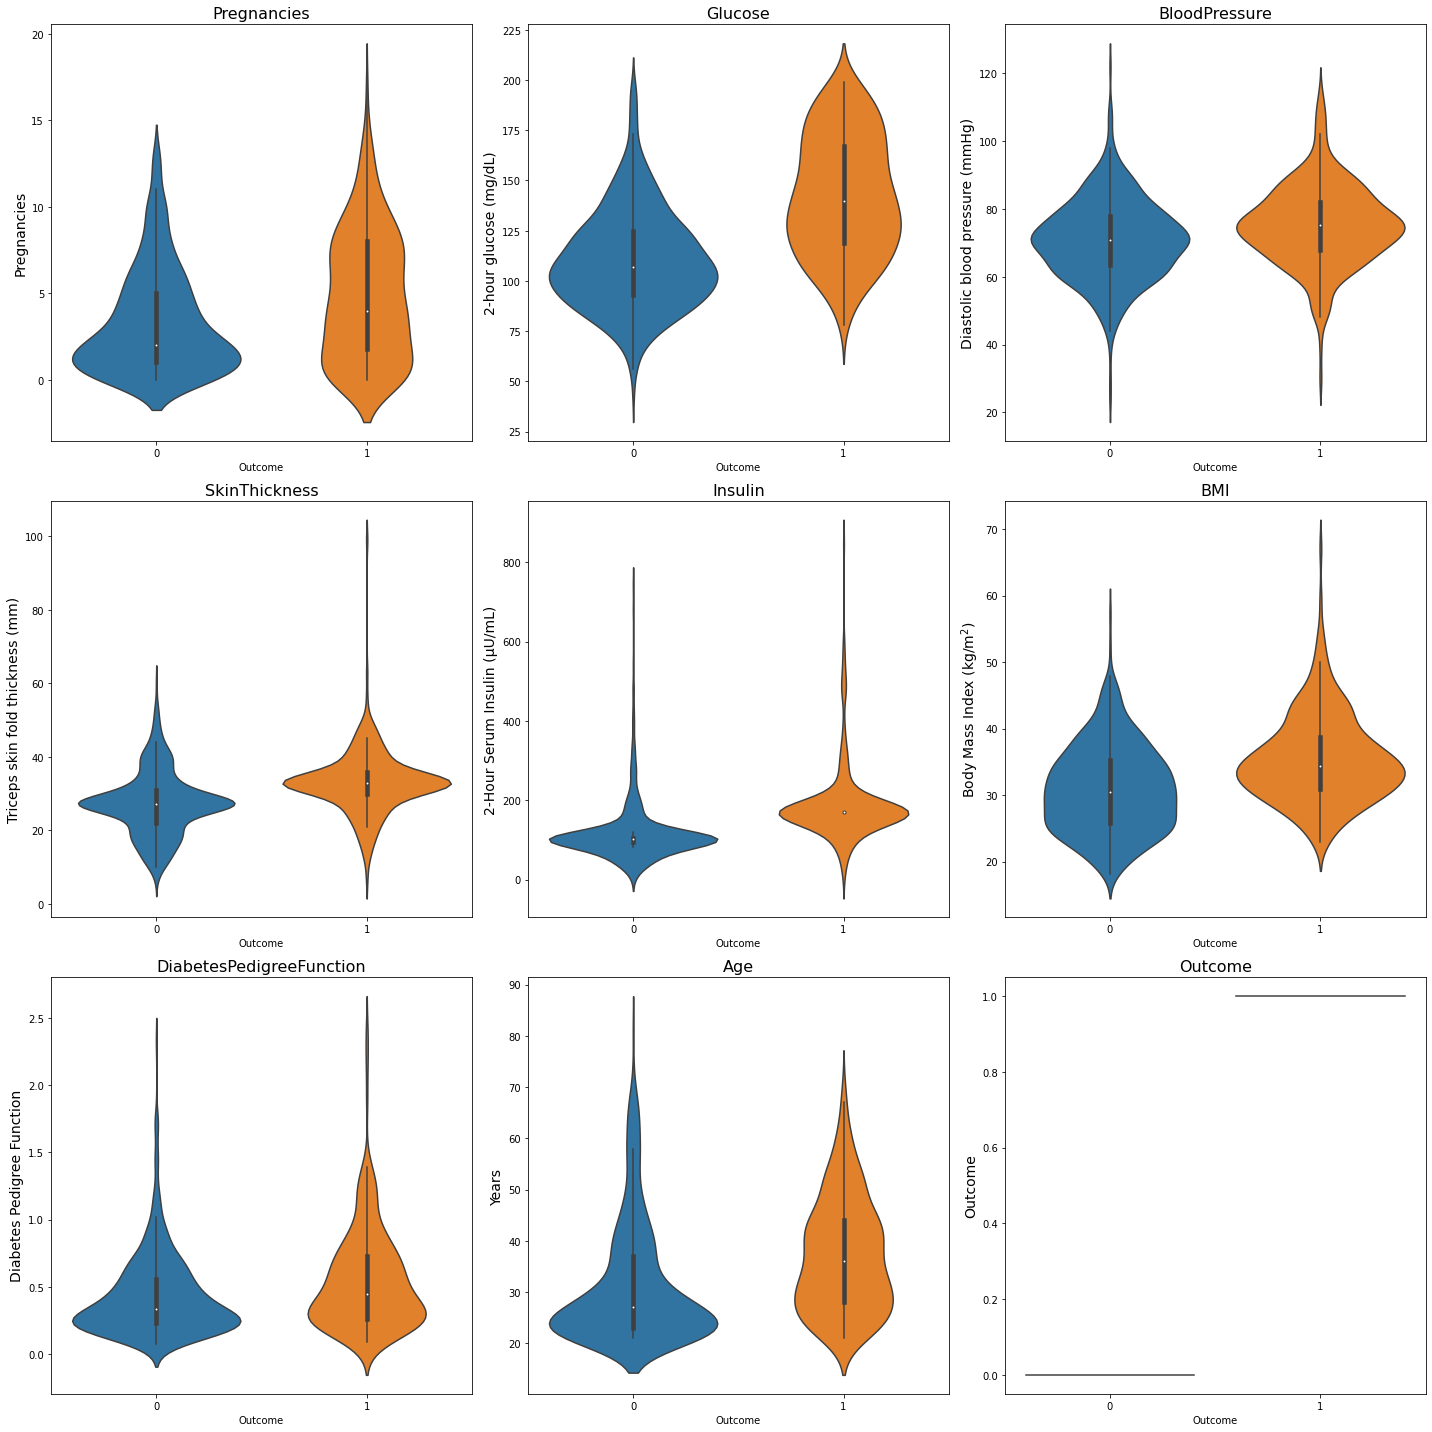

In [23]:
# Define the number of rows and columns for the subplots
nrows, ncols = 3, 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()
# axes = ["a","b","c","a","b","c","a","b","c"]

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(dfDia.columns):
    sns.violinplot(x="Outcome", y =col, data=dfDia, ax=axes[i])
    axes[0].set_ylabel('Pregnancies', fontsize=14)
    axes[1].set_ylabel('2-hour glucose (mg/dL)', fontsize=14)
    axes[2].set_ylabel('Diastolic blood pressure (mmHg)', fontsize=14)
    axes[3].set_ylabel('Triceps skin fold thickness (mm)', fontsize=14)
    axes[4].set_ylabel('2-Hour Serum Insulin (μU/mL)', fontsize=14)
    axes[5].set_ylabel('Body Mass Index (kg/m$^2$)', fontsize=14)
    axes[6].set_ylabel('Diabetes Pedigree Function', fontsize=14)
    axes[7].set_ylabel('Years', fontsize=14)
    axes[8].set_ylabel('Outcome', fontsize=14)
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, dfDia.columns):
    ax.set_title(col, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

It can be seen the distributions in diabetic females have higher values than non diabetic ones. Specially in Glucose, Pregnancies, BMI and Age like in mean imputation. Now, with conditional mean imputation we have the variables SkinThickness and Insulin more differentiated, but the distribution still seems artificial because all of the null values went to the center of the distribution.

## Data scaling

To ensure that the correlations are comparable, it is a good practice to scale the variables before calculating the correlation coefficients. This can help to avoid biases due to differences in the scaling of the variables, and it can also make the interpretation of the correlation coefficients easier.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfDiaScaled = dfDia.copy()
dfDiaScaled.iloc[:,:-1] = scaler.fit_transform(dfDia.drop('Outcome', axis=1))
#escalar solo el train para el ML pero para ver correlacion escalado con otra variable

# Correlations

Searching correlation among the columns in the Dataframe using the ‘Spearman’ method.

<!-- Since there are no outliers or extreme values that are too far from the rest, Pearson's correlation was chosen instead of Spearman's. -->

Data contains outliers and the relationship between the variables is not known, then Spearman correlation may be a better choice than Pearson.

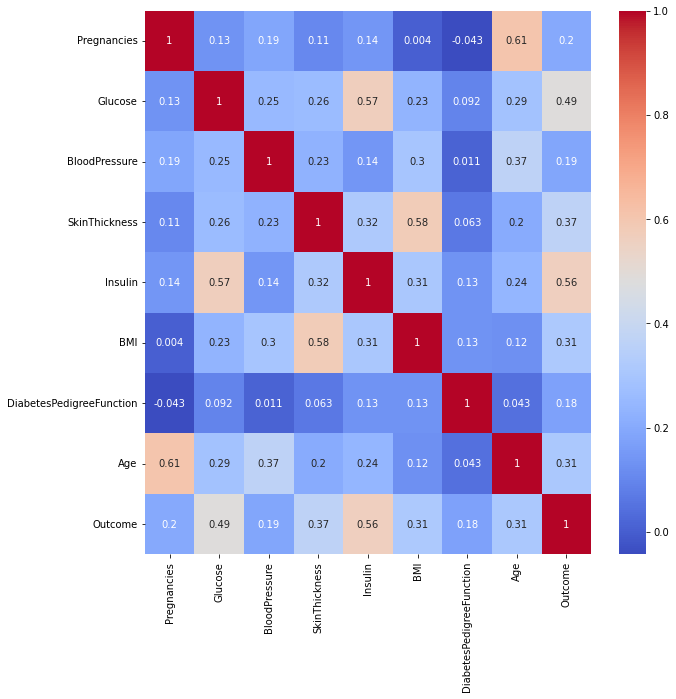

In [25]:
# Calculating correlation
corr_df = dfDiaScaled.corr(method ='spearman')
# Creating heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

# Showing heatmap
plt.show()

Spearman correlation among variables higher than 0.25:

In [26]:
# stack() function converts the correlation matrix into a long format, 
#where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs = corr_df[corr_df > 0.25].stack().reset_index()
# Eliminating duplicates
corr_pairs = corr_pairs[corr_pairs['level_0'] < corr_pairs['level_1']]

# Formatting the output
corr_pairs = corr_pairs.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs = corr_pairs.sort_values(by='corr', ascending=False)
corr_pairs.reset_index(drop=True)

,col1,col2,corr
0,Age,Pregnancies,0.607216
1,BMI,SkinThickness,0.577425
2,Glucose,Insulin,0.566551
3,Insulin,Outcome,0.562991
4,Glucose,Outcome,0.485358
5,Outcome,SkinThickness,0.367195
6,Age,BloodPressure,0.366769
7,Insulin,SkinThickness,0.318630
8,BMI,Outcome,0.311666
9,Age,Outcome,0.309040


Analyzing the correlations between predictor and target variables can help identify the strength and direction of the relationship between the predictors and the target. Correlation does not necessarily imply causation, but in the case it is known in advance in the medical field that this variables have a great influence in the diabetes disease. 

In [27]:
# stack() function converts the correlation matrix into a long format, 
#where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs = corr_df[corr_df > 0].stack().reset_index()
# Eliminating duplicates
corr_pairs = corr_pairs[corr_pairs['level_0'] < corr_pairs['level_1']]

# Formatting the output
corr_pairs = corr_pairs.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs = corr_pairs.sort_values(by='corr', ascending=False)

# Selecting rows with "Outcome" in either column
corr_pairs = corr_pairs[corr_pairs['col1'].str.extract(pat='(Outcome)', expand=False).notna() | corr_pairs['col2'].str.extract(pat='(Outcome)', expand=False).notna()]

# Resetting the index
corr_pairs = corr_pairs.reset_index(drop=True)
corr_pairs

,col1,col2,corr
0,Insulin,Outcome,0.562991
1,Glucose,Outcome,0.485358
2,Outcome,SkinThickness,0.367195
3,BMI,Outcome,0.311666
4,Age,Outcome,0.309040
5,Outcome,Pregnancies,0.198689
6,BloodPressure,Outcome,0.185560
7,DiabetesPedigreeFunction,Outcome,0.175353


If a predictor variable has a strong positive or negative correlation with the target variable, it may be a good predictor for the model. Thus, it can be seen that Insulin, Glucose, SkinThickness, BMI and Age will be good predictors having moderately strong positive correlation. As it can be seen in the map above, all of the predictors have a positive correlation, we can interpret that increasing one predictor variable will likely increase the target variable, as anyone with a smattering of general medicine can expect.

In [28]:
# stack() function converts the correlation matrix into a long format, 
#where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs = corr_df[corr_df>0].stack().reset_index()
# Eliminating duplicates
corr_pairs = corr_pairs[corr_pairs['level_0'] < corr_pairs['level_1']]

# Formatting the output
corr_pairs = corr_pairs.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs = corr_pairs.sort_values(by='corr', ascending=False)

# Selecting rows with "Outcome" in either column
corr_pairs = corr_pairs[~(corr_pairs['col1'].str.extract(pat='(Outcome)', expand=False).notna() | corr_pairs['col2'].str.extract(pat='(Outcome)', expand=False).notna())]

# Resetting the index
corr_pairs = corr_pairs.reset_index(drop=True)
corr_pairs

,col1,col2,corr
0,Age,Pregnancies,0.607216
1,BMI,SkinThickness,0.577425
2,Glucose,Insulin,0.566551
3,Age,BloodPressure,0.366769
4,Insulin,SkinThickness,0.318630
5,BMI,Insulin,0.305058
6,BMI,BloodPressure,0.298017
7,Age,Glucose,0.285721
8,Glucose,SkinThickness,0.260234
9,BloodPressure,Glucose,0.251749


The three first paris of variables could generate problems of multicollinearity in some machine learning algorithms with a negative impact in the performance of the model. It could be considered to remove either Age or Pregnancies, BMI or SkinThickness, and Glucose or Insulin, depending on their relative importance and relevance to the problem you are trying to solve.

But removing highly correlated variables may not always be the best approach, as some variables may still provide unique information even if they are correlated with others. In some cases, it may be better to use dimensionality reduction techniques like principal component analysis (PCA) or feature selection methods to identify the most important features.

Imputation issue:

Compared with simple mean imputation, now we have significant direct correlation of SkinThickness and Insulin with the target variable Outcome. It is expected to gain more capacity in the machine learning algorithms. Conditional mean imputation obtains higher correlation values than simple mean imputation.

Saving the dataset without scaling in a CSV.

In [29]:
dfDia.to_csv(".\datasets\diabetes_ConditionalMeanImputation.csv",index=False)